<a href="https://colab.research.google.com/github/faisalkabir1/lung-cancer-predict-ml-project/blob/main/lung.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd 
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, plot_roc_curve
from sklearn.preprocessing import Normalizer

In [ ]:
df= pd.read_csv("/content/cancer patient data sets.csv")
df.head(10)


,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High
5,5,P102,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
6,6,P103,52,2,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
7,7,P104,28,2,3,1,4,3,2,3,...,3,2,2,4,2,2,3,4,3,Low
8,8,P105,35,2,4,5,6,5,6,5,...,1,4,3,2,4,6,2,4,1,Medium
9,9,P106,46,1,2,3,4,2,4,3,...,1,2,4,6,5,4,2,1,5,Medium


In [ ]:
df=df.drop(['index','Patient Id'], axis = 1)

In [ ]:
df.replace(to_replace = "Low" , value = 0 , inplace = True)
df.replace(to_replace = "Medium" , value = 1 , inplace = True)
df.replace(to_replace = "High" , value = 1 , inplace = True)

In [ ]:
df['Level'].value_counts()

1    697
0    303
Name: Level, dtype: int64

In [ ]:
df.describe()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,4.465000,...,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000,0.697000
std,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,2.124921,...,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686,0.459785
min,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,3.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000
50%,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,4.000000,...,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,1.000000
75%,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,7.000000,...,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000,1.000000
max,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,7.000000,...,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000,1.000000


In [ ]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
target = df['Level']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state=99,stratify=target)

In [ ]:
N = df.shape[0]
train_percent = (X_train.shape[0] / N) * 100
test_percent = (X_test.shape[0] / N) * 100

print("Percentage of data split into the training set: {:.2f}%".format(train_percent))
print("Percentage of data split into the testing set: {:.2f}%".format(test_percent))


Percentage of data split into the training set: 70.00%
Percentage of data split into the testing set: 30.00%


In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(
    criterion = "gini",
    max_depth=8,
    min_samples_split=10,
    random_state=5
)

In [ ]:
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, min_samples_split=10, random_state=5)

In [ ]:
clf.feature_importances_

array([0.00353902, 0.        , 0.01925858, 0.09871282, 0.10309095,
       0.05402324, 0.04710104, 0.03266516, 0.03095751, 0.08406279,
       0.00892168, 0.01583104, 0.00989073, 0.04759853, 0.08560296,
       0.03265101, 0.0461381 , 0.07614224, 0.05604203, 0.03321143,
       0.03354826, 0.02002255, 0.06098833])

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test , y_pred)
from sklearn.metrics import accuracy_score
accuracy_score(y_test , y_pred)
from sklearn.model_selection import cross_val_score

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_pred , y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        91
           1       1.00      1.00      1.00       209

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



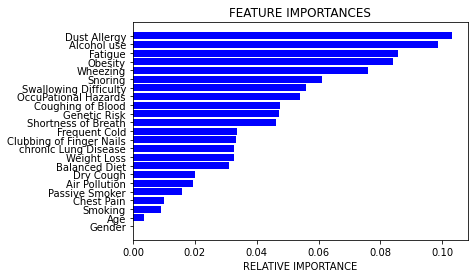

In [ ]:
features = df.columns
importances = clf.feature_importances_
indices = np.argsort(importances)

plt.title('FEATURE IMPORTANCES')
plt.barh(range(len(indices)),importances[indices], color='b' , align="center")
plt.yticks(range(len(indices)),[features[i] for i in indices])
plt.xlabel('RELATIVE IMPORTANCE')
plt.show()

In [ ]:
tp, fp, fn, tn = confusion_matrix(y_test, y_pred).ravel()
(tp, fp, fn, tn)

(91, 0, 0, 209)

In [ ]:
accuracy = (tp+tn)/(tp+fp+fn+tn)
accuracy

1.0

In [ ]:
precision = tp/(tp+fp)
precision

1.0

In [ ]:
recall = tp/(tp+fn)
recall

1.0

In [ ]:
f1 = 2*(precision*recall)/(precision+recall)
f1

1.0